## **METRICS FOR CLASSIFICATION**

Metrics for balanced data sets.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small.csv')
df.head()

,cc_num,amt,gender,category,is_fraud
0,213199865312311,49.32,M,gas_transport,0
1,4474324669797121,144.14,M,grocery_pos,0
2,6011860238257910,63.24,F,gas_transport,0
3,180048185037117,129.18,F,misc_pos,0
4,4584931703207308232,48.83,F,home,0


In [2]:
## missing values
df.isnull().sum()

,0
cc_num,0
amt,0
gender,0
category,0
is_fraud,0


In [3]:
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [4]:
## encode (dummy)
df = pd.get_dummies(df, drop_first=True)

In [5]:
## X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [6]:
## value_counts for is_fraud
## 50% and 50% non-frauds
## perfectly balanced data set created by keeping ALL frauds and downsampling the non-frauds
y.value_counts()

,count
is_fraud,
0,100
1,100


In [7]:
df.head()

,amt,is_fraud,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,49.32,0,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1,144.14,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,63.24,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,129.18,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,48.83,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [8]:
## split into 70% and 30% random_state = 591
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=591)

In [9]:
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression()

## fit
lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
## PREDICTIONS
y_pred = lr.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [13]:
y_test[:10].values

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [15]:
## CONFUSION MATRIX (sklearn)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## numpy matrix
confusion_matrix(y_test, y_pred)

array([[27,  2],
       [11, 20]])

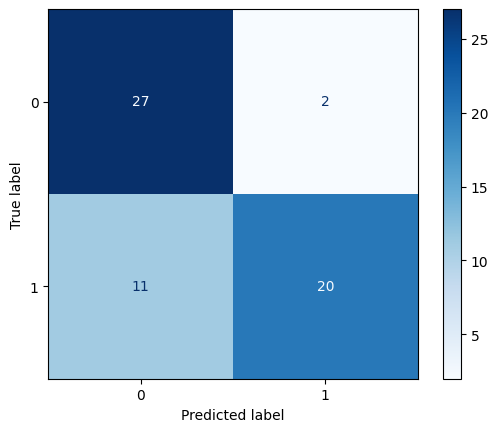

In [19]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [16]:
## accuracy of the model
(27 + 20) / len(y_test)

0.7833333333333333

In [20]:
## sklearn accuracy function
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7833333333333333

In [21]:
## ERROR = 1 - accuracy
## sklearn does NOT have an error function
1 - accuracy_score(y_test, y_pred)

0.21666666666666667

In [22]:
## Recall or Sensitivity or TPR or Detection Rate
## 1) determine how many 1s in total = 31
## 2) how many of those were predicted 1s = 20
20 / 31

0.6451612903225806

In [23]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6451612903225806

In [24]:
## SPECIFICITY
## 1) determine how many 0s in total = 29
## 2) how many of those were predicted 0s = 27
27 / 29

0.9310344827586207

In [30]:
## sklearn does NOT have a specificity score
## imbalanced learning - specificity score
from imblearn.metrics import specificity_score

specificity_score(y_test, y_pred)

0.9310344827586207

In [31]:
## specificity is NOT a common metric
## 1 - specificity is MORE COMMMON
## FPR = 1 - specificity
FPR = specificity_score(y_test, y_pred)

In [32]:
## PRECISION
## 1) how many 1s were predicted: 22
## 2) how many 1s were predicted correctly: 20
20 / 22

0.9090909090909091

In [33]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9090909090909091

In [34]:
## F1 SCORE
## 1) you need the recall and the precision
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7547169811320755

In [35]:
## for perfect balanced. Accuracy and F1 score are optimal
accuracy_score(y_test, y_pred)

0.7833333333333333

In [36]:
0.7833333333333333 / 0.5

1.5666666666666667

## **IMBALANCED DATA SETS METRICS**

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small_imbalanced.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130147 entries, 0 to 130146
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   cc_num    130147 non-null  float64
 1   amt       130147 non-null  float64
 2   gender    130147 non-null  object 
 3   category  130147 non-null  object 
 4   is_fraud  130146 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.0+ MB


In [39]:
## value counts of y
## 0.4% fraudulent transactions
df['is_fraud'].value_counts() / len(df)

,count
is_fraud,
0.0,0.995951
1.0,0.004042


In [40]:
## drop cc_num
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [41]:
## encode (dummy)
df = pd.get_dummies(df, drop_first=True)

In [45]:
## REMOVE MISSING VALUES
df.dropna(inplace=True)

In [46]:
## X and y
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [47]:
## split into 80% and 20% random_state = 591
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=591)

In [48]:
## LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression()

## fit
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
## predictions
y_pred = lr.predict(X_test)

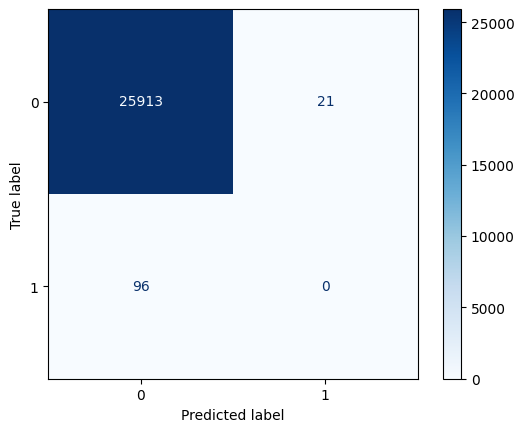

In [50]:
## confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues")

In [52]:
## accuracy NOT a good metric for imbalanced datasets
accuracy_score(y_test, y_pred)

0.995505186323473

In [53]:
## detection rate
recall_score(y_test, y_pred)

0.0

In [54]:
## precision score
precision_score(y_test, y_pred)

0.0

In [55]:
specificity_score(y_test, y_pred)

0.9991902521786072

In [57]:
## instead of accuracy use the balanced_accuracy
## compare to 50%
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.4995951260893036

In [58]:
## 1) create a balanced data set for the training (50% - 50%) or (80% - 20%)
## 2) use the test (normal) but use balanced_accuracy, recall to determine the effectiveness

## **PROPENSITY MODELING**

We analyze the probabilities and we can better select thresholds or maybe rank-order the probabilities

In [61]:
## instead of y_pred = lr.predict(X_test)
## obtain the p_hat
## if you use 0 and 1 encoding
p_hat = lr.predict_proba(X_test)[:,1]

In [62]:
## next step select threshold
p_hat

array([0.0070788 , 0.01319704, 0.00250617, ..., 0.00249869, 0.00204005,
       0.00731963])